In [1]:
import pandas as pd

# Load the dataset
file_path = 'horse_details.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(), df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743582 entries, 0 to 743581
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   At İsmi      743582 non-null  object 
 1   Irk          743582 non-null  object 
 2   Cinsiyet     743582 non-null  object 
 3   Yaş          743582 non-null  object 
 4   Doğ. Trh     743491 non-null  object 
 5   Handikap P.  712298 non-null  float64
 6   Tarih        717838 non-null  object 
 7   Şehir        717838 non-null  object 
 8   Mesafe       717838 non-null  float64
 9   Pist         717838 non-null  object 
 10  Derece       717712 non-null  object 
 11  Siklet       717838 non-null  object 
 12  Takı         630172 non-null  object 
 13  Jokey        717835 non-null  object 
 14  details      743582 non-null  object 
dtypes: float64(2), object(13)
memory usage: 85.1+ MB


(                      At İsmi      Irk Cinsiyet       Yaş    Doğ. Trh  \
 0            A BEAUTIFUL MIND  İngiliz     Dişi   6 y  dk  16.03.2018   
 1  A BEAUTIFUL MIND 2023 Tayı  İngiliz     Dişi   1 y  dd  14.03.2023   
 2  A BEAUTIFUL MIND 2024 Tayı  İngiliz    Erkek   0 y  de  12.03.2024   
 3                   A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020   
 4                   A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020   
 
    Handikap P.       Tarih     Şehir  Mesafe         Pist   Derece Siklet  \
 0          NaN         NaN       NaN     NaN          NaN      NaN    NaN   
 1          NaN         NaN       NaN     NaN          NaN      NaN    NaN   
 2          NaN         NaN       NaN     NaN          NaN      NaN    NaN   
 3         20.0  09.08.2023  İstanbul  1400.0  Ç:Normal3.3  1.27.52     58   
 4         20.0  09.07.2023  İstanbul  1500.0     S:Normal  1.33.64     50   
 
    Takı     Jokey                                            details  
 0   NaN    

In [2]:
# Remove rows where "Derece" is missing or "Drcsz"
df_cleaned = df[~df['Derece'].isin(['Drcsz', None, 'NONE'])]

# Remove rows with missing "Şehir" or "Mesafe"
df_cleaned = df_cleaned.dropna(subset=['Şehir', 'Mesafe'])

# Convert "Derece" to milliseconds
def convert_to_milliseconds(derece):
    if isinstance(derece, str):
        try:
            minutes, seconds, milliseconds = map(int, derece.split('.'))
            return (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        except ValueError:
            return None
    return None

df_cleaned['Derece_ms'] = df_cleaned['Derece'].apply(convert_to_milliseconds)

# Drop rows where conversion failed (if any)
df_cleaned = df_cleaned.dropna(subset=['Derece_ms'])

# Display the first few rows of the cleaned dataset
df_cleaned.head(), df_cleaned.info(), df_cleaned.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 705640 entries, 3 to 743579
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   At İsmi      705640 non-null  object 
 1   Irk          705640 non-null  object 
 2   Cinsiyet     705640 non-null  object 
 3   Yaş          705640 non-null  object 
 4   Doğ. Trh     705640 non-null  object 
 5   Handikap P.  699818 non-null  float64
 6   Tarih        705640 non-null  object 
 7   Şehir        705640 non-null  object 
 8   Mesafe       705640 non-null  float64
 9   Pist         705640 non-null  object 
 10  Derece       705640 non-null  object 
 11  Siklet       705640 non-null  object 
 12  Takı         619546 non-null  object 
 13  Jokey        705639 non-null  object 
 14  details      705640 non-null  object 
 15  Derece_ms    705640 non-null  float64
dtypes: float64(3), object(13)
memory usage: 91.5+ MB


(          At İsmi      Irk Cinsiyet       Yaş    Doğ. Trh  Handikap P.  \
 3       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 4       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 5       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 6       A BİENTOT  İngiliz    Erkek  4 y  d a  06.04.2020         20.0   
 8  A DROP OF LOVE  İngiliz     Dişi  21 y  dk  14.05.2003         50.0   
 
         Tarih     Şehir  Mesafe                Pist   Derece Siklet  Takı  \
 3  09.08.2023  İstanbul  1400.0         Ç:Normal3.3  1.27.52     58  DBSK   
 4  09.07.2023  İstanbul  1500.0            S:Normal  1.33.64     50    SK   
 5  24.06.2023  İstanbul  1600.0         Ç:Normal3.3  1.41.76     58     K   
 6  04.06.2023  İstanbul  1400.0    Ç:Çok Yumuşak3.9  1.31.05     58     K   
 8  01.12.2008     Adana  1300.0  Ç:Biraz Yumuşak3.4  1.23.09     55     K   
 
       Jokey                                            details  Derece_ms  
 

In [3]:
import re

# Function to parse the "Yaş" column into numeric age and classification
def parse_yas(yas):
    # Extract numeric age (the part before 'y')
    age_match = re.search(r'(\d+)\sy', yas)
    age = int(age_match.group(1)) if age_match else None
    
    # Extract the classification symbols after 'y'
    classification_match = re.search(r'y\s*([a-zA-Z]{2})', yas.replace(" ", ""))
    classification = classification_match.group(1) if classification_match else None
    
    return age, classification

# Apply the function to create two new columns
df_cleaned['Age'], df_cleaned['Condition'] = zip(*df_cleaned['Yaş'].apply(parse_yas))

# Drop the original "Yaş" column as it has been parsed
df_cleaned = df_cleaned.drop(columns=['Yaş'])

# Display the first few rows of the cleaned and engineered dataset
print(df_cleaned.head())
print(df_cleaned[['Age', 'Condition']].describe(include='all'))


          At İsmi      Irk Cinsiyet    Doğ. Trh  Handikap P.       Tarih  \
3       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  09.08.2023   
4       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  09.07.2023   
5       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  24.06.2023   
6       A BİENTOT  İngiliz    Erkek  06.04.2020         20.0  04.06.2023   
8  A DROP OF LOVE  İngiliz     Dişi  14.05.2003         50.0  01.12.2008   

      Şehir  Mesafe                Pist   Derece Siklet  Takı     Jokey  \
3  İstanbul  1400.0         Ç:Normal3.3  1.27.52     58  DBSK  O.ÖZTÜRK   
4  İstanbul  1500.0            S:Normal  1.33.64     50    SK   E.AVŞAR   
5  İstanbul  1600.0         Ç:Normal3.3  1.41.76     58     K  O.ÖZTÜRK   
6  İstanbul  1400.0    Ç:Çok Yumuşak3.9  1.31.05     58     K  M.HAMEDİ   
8     Adana  1300.0  Ç:Biraz Yumuşak3.4  1.23.09     55     K   M.BAYIR   

                                             details  Derece_ms  Age Condition  
3  https://

In [4]:
# drop age column because it is not useful
df_cleaned = df_cleaned.drop(columns=['Age'])

# calculate the age of the horse at the time of the race
df_cleaned['Doğum Tarihi'] = pd.to_datetime(df_cleaned['Doğ. Trh'], dayfirst=True)
df_cleaned['Yarış Tarihi'] = pd.to_datetime(df_cleaned['Tarih'], dayfirst=True)
df_cleaned['Age'] = df_cleaned['Yarış Tarihi'].dt.year - df_cleaned['Doğum Tarihi'].dt.year

# drop the original columns
df_cleaned = df_cleaned.drop(columns=['Doğ. Trh', 'Tarih', 'Doğum Tarihi', 'Yarış Tarihi'])

# Display the first few rows of the cleaned and engineered dataset
print(df_cleaned.head())

          At İsmi      Irk Cinsiyet  Handikap P.     Şehir  Mesafe  \
3       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1400.0   
4       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1500.0   
5       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1600.0   
6       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1400.0   
8  A DROP OF LOVE  İngiliz     Dişi         50.0     Adana  1300.0   

                 Pist   Derece Siklet  Takı     Jokey  \
3         Ç:Normal3.3  1.27.52     58  DBSK  O.ÖZTÜRK   
4            S:Normal  1.33.64     50    SK   E.AVŞAR   
5         Ç:Normal3.3  1.41.76     58     K  O.ÖZTÜRK   
6    Ç:Çok Yumuşak3.9  1.31.05     58     K  M.HAMEDİ   
8  Ç:Biraz Yumuşak3.4  1.23.09     55     K   M.BAYIR   

                                             details  Derece_ms Condition  Age  
3  https://www.tjk.org/TR/YarisSever/Query/Connec...    87052.0        da    3  
4  https://www.tjk.org/TR/YarisSever/Query/Connec...    93064.0        da 

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Convert "Cinsiyet" and "Irk" to single binary columns
df_cleaned['Cinsiyet_binary'] = df_cleaned['Cinsiyet'].apply(lambda x: 1 if x == 'Erkek' else 0)
df_cleaned['Irk_binary'] = df_cleaned['Irk'].apply(lambda x: 1 if x == 'İngiliz' else 0)

# Step 2: One-Hot Encode the "Condition" feature
df_encoded = pd.get_dummies(df_cleaned, columns=['Condition'])

# Step 3: Normalize numerical features
scaler = MinMaxScaler()
df_encoded[['Mesafe_normalized', 'Age_normalized', 'Derece_ms_normalized']] = scaler.fit_transform(df_encoded[['Mesafe', 'Age', 'Derece_ms']])

# Display the first few rows of the final prepared dataset
print(df_encoded.head())


          At İsmi      Irk Cinsiyet  Handikap P.     Şehir  Mesafe  \
3       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1400.0   
4       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1500.0   
5       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1600.0   
6       A BİENTOT  İngiliz    Erkek         20.0  İstanbul  1400.0   
8  A DROP OF LOVE  İngiliz     Dişi         50.0     Adana  1300.0   

                 Pist   Derece Siklet  Takı  ... Condition_ka Condition_kd  \
3         Ç:Normal3.3  1.27.52     58  DBSK  ...        False        False   
4            S:Normal  1.33.64     50    SK  ...        False        False   
5         Ç:Normal3.3  1.41.76     58     K  ...        False        False   
6    Ç:Çok Yumuşak3.9  1.31.05     58     K  ...        False        False   
8  Ç:Biraz Yumuşak3.4  1.23.09     55     K  ...        False        False   

   Condition_ke  Condition_kg  Condition_kk  Condition_ya  Condition_yk  \
3         False         False      

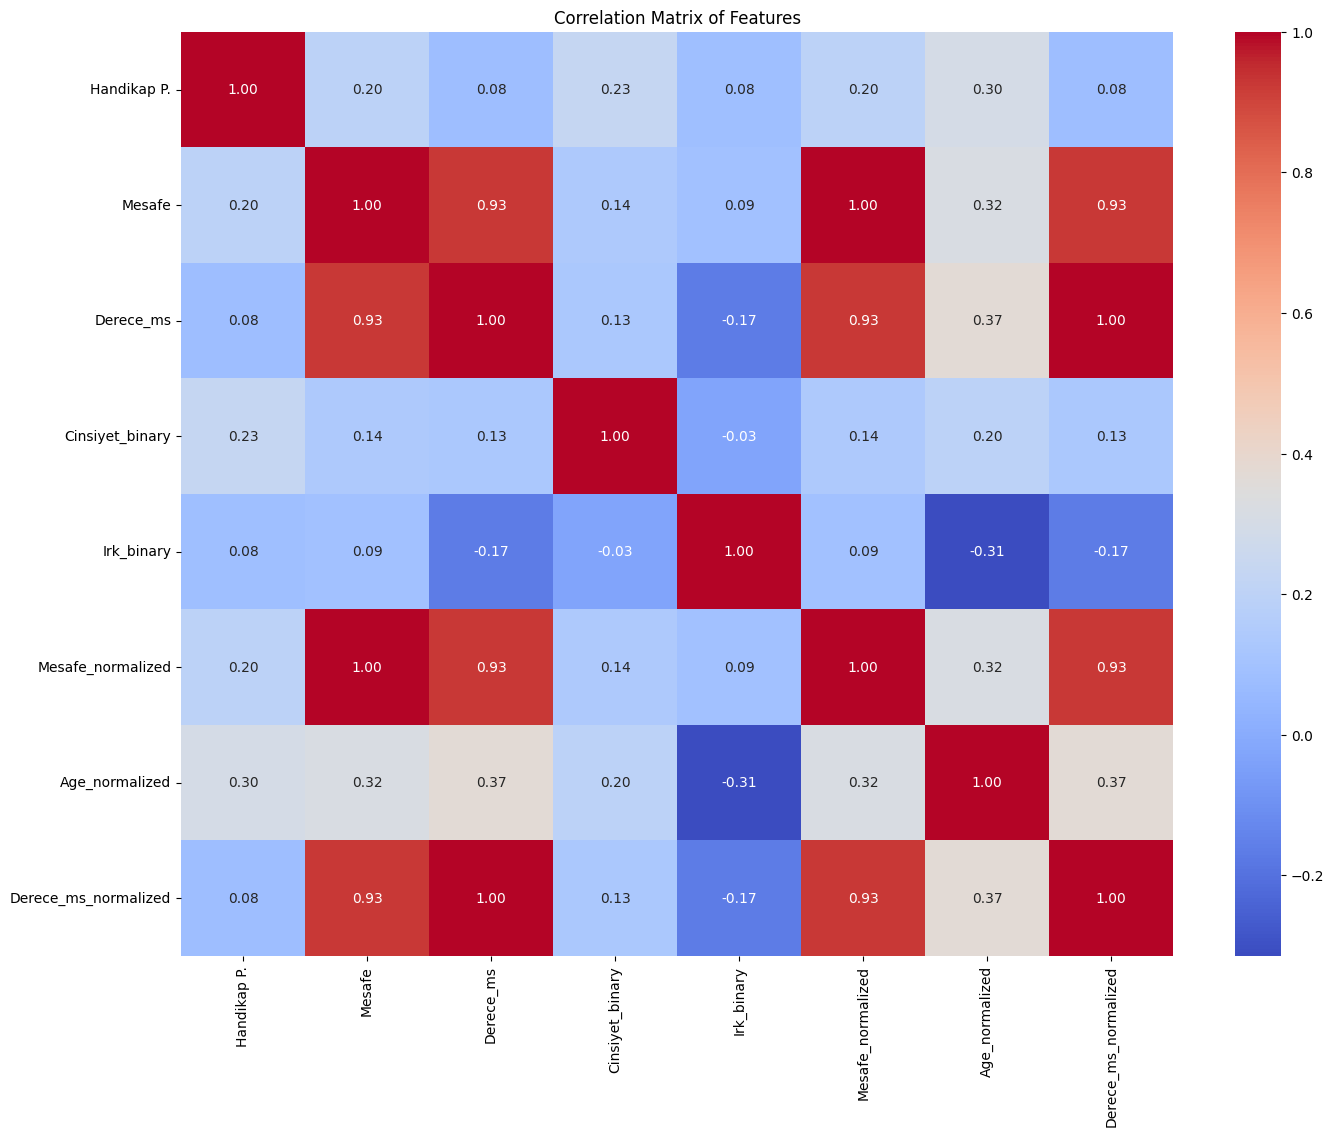

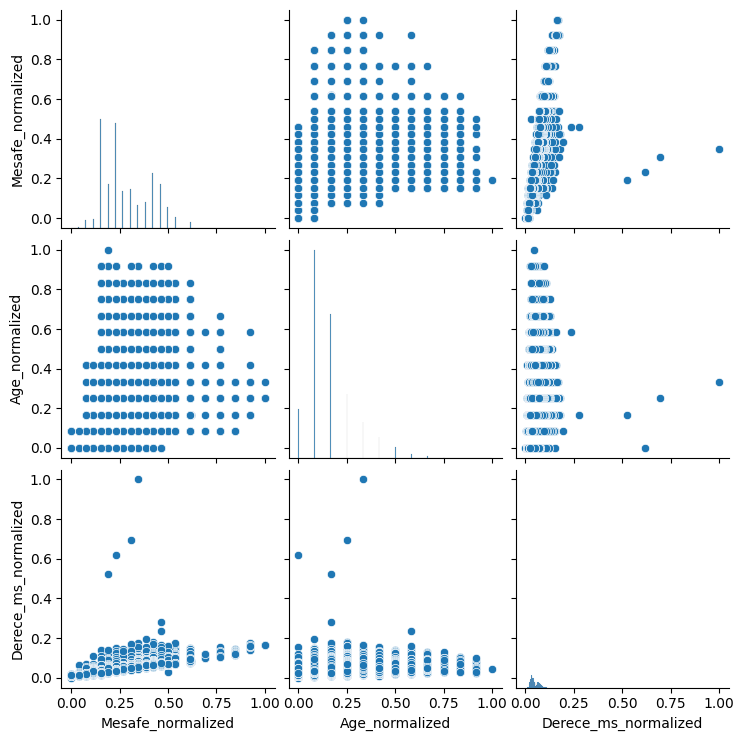

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns for correlation matrix
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Check correlation between numerical features and encoded features
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Analyzing interaction between "Mesafe" and other features
sns.pairplot(numeric_df[['Mesafe_normalized', 'Age_normalized', 'Derece_ms_normalized'] + [col for col in numeric_df.columns if 'Condition_' in col]])
plt.show()

In [7]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, feature):
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Detect outliers in "Mesafe" and "Derece_ms"
outliers_mesafe = detect_outliers_iqr(df_encoded, 'Mesafe_normalized')
outliers_derece = detect_outliers_iqr(df_encoded, 'Derece_ms_normalized')

# Combine detected outliers for exclusion
outliers_combined = pd.concat([outliers_mesafe, outliers_derece]).drop_duplicates()

# Display the number of outliers detected
print(f"Outliers detected in 'Mesafe_normalized': {len(outliers_mesafe)}")
print(f"Outliers detected in 'Derece_ms_normalized': {len(outliers_derece)}")
print(f"Total unique outliers detected: {len(outliers_combined)}")

# Exclude outliers from the dataset
df_no_outliers = df_encoded.drop(outliers_combined.index)

# Display the shape of the dataset after excluding outliers
print(f"Dataset shape after outlier exclusion: {df_no_outliers.shape}")


Outliers detected in 'Mesafe_normalized': 82
Outliers detected in 'Derece_ms_normalized': 1023
Total unique outliers detected: 1017
Dataset shape after outlier exclusion: (704623, 36)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encode the "Şehir" column
label_encoder = LabelEncoder()
df_no_outliers['City_label'] = label_encoder.fit_transform(df_no_outliers['Şehir'])

# Get the mapping of cities to their encoded values
city_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(city_mapping)

{'ABD': np.int64(0), 'Abu Dhabi Birleşik Arap Emirlikleri': np.int64(1), 'Adana': np.int64(2), 'Ankara': np.int64(3), 'Antalya': np.int64(4), 'Bursa': np.int64(5), 'Churchill Downs ABD': np.int64(6), 'Deauville Fransa': np.int64(7), 'Diyarbakır': np.int64(8), 'Elazığ': np.int64(9), 'Kempton Park Birleşik Krallık': np.int64(10), 'Kocaeli': np.int64(11), 'Meydan Dubai': np.int64(12), 'Santa Anita Park ABD': np.int64(13), 'İstanbul': np.int64(14), 'İzmir': np.int64(15), 'Şanlıurfa': np.int64(16)}


TypeError: Object of type int64 is not JSON serializable

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# X = df_no_outliers.drop(columns=['Derece_ms'])
X = df_no_outliers
y = df_no_outliers['Derece_ms_normalized']

# Split the data into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
# Save training and test csv files
X_train.to_csv('train.csv', index=False)
X_val.to_csv('validation.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [11]:
X_train

,At İsmi,Irk,Cinsiyet,Handikap P.,Şehir,Mesafe,Pist,Derece,Siklet,Takı,...,Condition_kd,Condition_ke,Condition_kg,Condition_kk,Condition_ya,Condition_yk,Mesafe_normalized,Age_normalized,Derece_ms_normalized,City_label
313255,HASFIRTINA,İngiliz,Erkek,36.0,Elazığ,1200.0,K:Normal,1.22.38,"58,5",NaN,...,False,False,False,False,False,False,0.153846,0.250000,0.028424,9
629069,SUHULET,İngiliz,Dişi,32.0,İstanbul,1200.0,S:Normal,1.16.52,53,SK,...,False,False,False,False,False,False,0.153846,0.083333,0.023566,14
94107,BAYINDIRBEY,Arap,Erkek,70.0,Şanlıurfa,1300.0,K:Sulu,1.32.93,58,DB,...,False,False,False,False,False,False,0.192308,0.166667,0.036586,16
200976,DIVINE LOVE,İngiliz,Dişi,18.0,Bursa,1700.0,Ç:Normal3.2,1.45.79,54,KGKDB,...,False,False,False,False,False,False,0.346154,0.083333,0.047126,5
438629,MAHCUP,İngiliz,Dişi,41.0,İzmir,1400.0,K:Normal,1.29.90,50,NaN,...,False,False,False,False,False,False,0.230769,0.250000,0.034148,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273179,GHOST WARRIOR,İngiliz,Erkek,16.0,İstanbul,2000.0,S:Normal,2.05.52,51,SKGSK,...,False,False,False,False,False,False,0.461538,0.083333,0.063336,14
385538,KING OF TOKÇALAR,İngiliz,Erkek,33.0,Bursa,2000.0,K:Islak,2.13.17,53,KGDBSK,...,False,False,False,False,False,False,0.461538,0.083333,0.069801,5
138954,CAN OĞLUM,Arap,Erkek,43.0,İstanbul,2200.0,S:Normal,2.37.94,53,KG,...,False,False,False,False,False,False,0.538462,0.250000,0.089343,14
708326,WEST SIDE GLORY,İngiliz,Erkek,34.0,Adana,1400.0,K:Normal,1.30.39,57,KGK,...,False,False,False,False,False,False,0.230769,0.000000,0.034918,2


In [12]:
# Drop unnecessary columns from the datasets
columns_to_drop = ['At İsmi', 'Irk', 'Cinsiyet', 'Handikap P.', 'Şehir', 'Mesafe', 'Pist', 'Derece', 'Siklet', 
                   'Takı', 'Jokey', 'details', 'Derece_ms', 'Derece_ms_normalized', 'Age']
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [13]:
X_train

,Cinsiyet_binary,Irk_binary,Condition_aa,Condition_ad,Condition_ae,Condition_ag,Condition_ak,Condition_da,Condition_dd,Condition_de,...,Condition_ka,Condition_kd,Condition_ke,Condition_kg,Condition_kk,Condition_ya,Condition_yk,Mesafe_normalized,Age_normalized,City_label
313255,1,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,0.153846,0.250000,9
629069,0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.153846,0.083333,14
94107,1,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.192308,0.166667,16
200976,0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.346154,0.083333,5
438629,0,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.230769,0.250000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273179,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0.461538,0.083333,14
385538,1,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,0.461538,0.083333,5
138954,1,0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,0.538462,0.250000,14
708326,1,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,0.230769,0.000000,2


[0]	train-rmse:0.01798	eval-rmse:0.01807
[1]	train-rmse:0.01627	eval-rmse:0.01635
[2]	train-rmse:0.01474	eval-rmse:0.01481
[3]	train-rmse:0.01338	eval-rmse:0.01344
[4]	train-rmse:0.01216	eval-rmse:0.01222
[5]	train-rmse:0.01108	eval-rmse:0.01112
[6]	train-rmse:0.01012	eval-rmse:0.01015
[7]	train-rmse:0.00926	eval-rmse:0.00929
[8]	train-rmse:0.00851	eval-rmse:0.00853
[9]	train-rmse:0.00784	eval-rmse:0.00786
[10]	train-rmse:0.00726	eval-rmse:0.00727
[11]	train-rmse:0.00675	eval-rmse:0.00676
[12]	train-rmse:0.00631	eval-rmse:0.00631
[13]	train-rmse:0.00593	eval-rmse:0.00592
[14]	train-rmse:0.00560	eval-rmse:0.00559
[15]	train-rmse:0.00532	eval-rmse:0.00530
[16]	train-rmse:0.00507	eval-rmse:0.00506
[17]	train-rmse:0.00487	eval-rmse:0.00485
[18]	train-rmse:0.00470	eval-rmse:0.00468
[19]	train-rmse:0.00456	eval-rmse:0.00453
[20]	train-rmse:0.00444	eval-rmse:0.00441
[21]	train-rmse:0.00434	eval-rmse:0.00431
[22]	train-rmse:0.00425	eval-rmse:0.00422
[23]	train-rmse:0.00418	eval-rmse:0.00415
[2

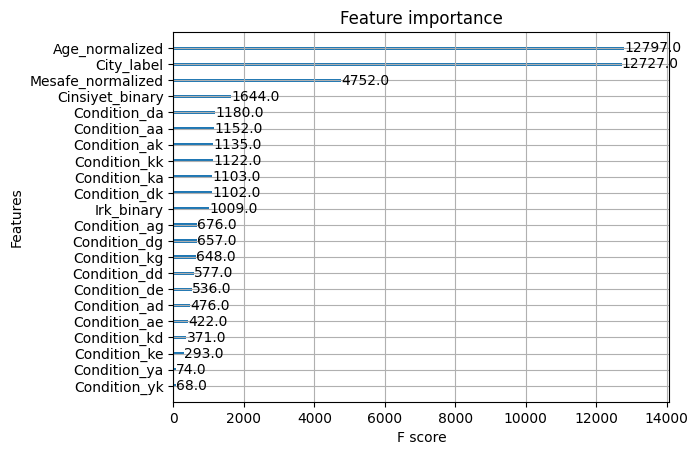

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Convert the datasets into DMatrix, which is a data structure optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up initial parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 10,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'seed': 42
}

# Train the XGBoost model
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error on Test Set: {rmse}')

# Plot feature importance
xgb.plot_importance(model, importance_type='weight')
plt.show()

In [15]:
# export the model
import joblib

# Define the model file name
model_file = 'xgboost_model.pkl'

# Save the model to disk
joblib.dump(model, model_file)

# # Load the model back from disk
# loaded_model = joblib.load(model_file)

['xgboost_model.pkl']

In [46]:
# Import the necessary library for DMatrix
import xgboost as xgb

# Let's take a random sample from the test set
sample_index = 0
sample_data = X_test.iloc[sample_index:sample_index+1]

# Convert the sample data to DMatrix format
dmat_sample_data = xgb.DMatrix(sample_data)

# Make a prediction
predicted_derece_ms = model.predict(dmat_sample_data)
print(f'Predicted Derece_ms: {predicted_derece_ms[0]}')

# Create a 2D array for inverse transformation
normalized_values = [X_test.iloc[sample_index]["Mesafe_normalized"], X_test.iloc[sample_index]["Age_normalized"], predicted_derece_ms[0]]
normalized_values_reshaped = [normalized_values]

# Convert the normalized prediction back to the original scale
predicted_derece = scaler.inverse_transform(normalized_values_reshaped)[0][2]
print(f'Predicted Derece: {predicted_derece}')

# turn ms into minutes:seconds:milliseconds
def convert_to_time(derece):
    minutes = int(derece / (60 * 1000))
    seconds = int((derece % (60 * 1000)) / 1000)
    milliseconds = int(derece % 1000)
    return f'{minutes}:{seconds:02d}.{milliseconds:03d}'

# Convert the predicted time to the desired format
predicted_time = convert_to_time(predicted_derece)
print(f'Predicted Time: {predicted_time}')


Predicted Derece_ms: 0.05561910197138786
Predicted Derece: 115543.68258498983
Predicted Time: 1:55.543


In [43]:
sample_data

,Cinsiyet_binary,Irk_binary,Condition_aa,Condition_ad,Condition_ae,Condition_ag,Condition_ak,Condition_da,Condition_dd,Condition_de,...,Condition_ka,Condition_kd,Condition_ke,Condition_kg,Condition_kk,Condition_ya,Condition_yk,Mesafe_normalized,Age_normalized,City_label
519253,0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,0.384615,0.166667,16
